In [1]:
import pandas as pd
import requests
import copy
import numpy as np
import time
import os
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline 
import psycopg2
import sys

In [2]:
fn = '/home/shadi/db_pwd.secret'
pwd = open(fn, 'r').read().strip()
engine = create_engine("postgresql+psycopg2://shadi:%s@localhost/cryppro_v0"%pwd)

df2 = pd.read_sql_table('btcprice', con=engine)

In [3]:
df2['timestamp'] =  pd.to_datetime(df2['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
df2 = df2.set_index('timestamp')

In [4]:
df2['std'] = df2['spread'].rolling(window=5).std()
df2['spread + std'] = df2['spread'] + df2['std']
df2['spread - std'] = df2['spread'] - df2['std']

In [3]:
#Calculating Volatility
volatility_std = np.std(df2['spread'])
#pd.Series([float(x) for x in spread_array]).std()
volatility_var = np.var(df2['spread'])
print('Volatility with standard deviation: %8f'%volatility_std)    
print('and variance: %8f'%volatility_var)

Volatility with standard deviation: 2.215908
and variance: 4.910249


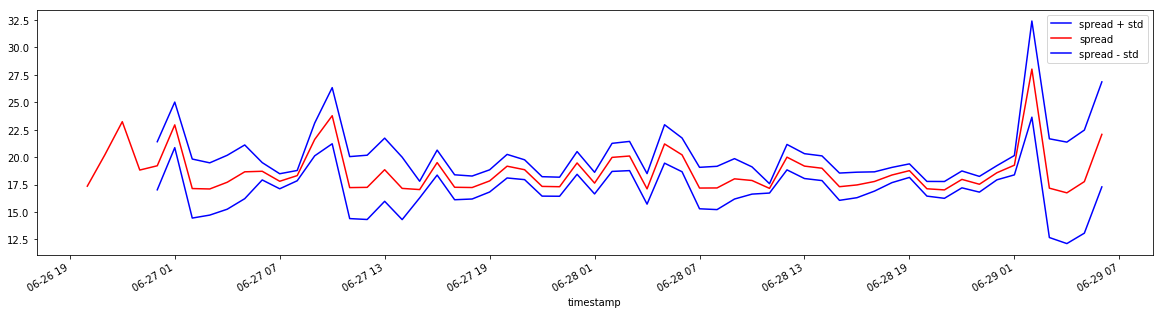

In [13]:
df2[['spread + std', 'spread', 'spread - std']].plot(figsize=(20,5), style=['b','r','b'])
plt.show()